# Cross Validation and Correlation studies

In [1]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Set and confirm working directory

In [2]:
current_dir = os.getcwd()
current_dir

'/workspace/portfolio-project-5-price-predictor/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/workspace/portfolio-project-5-price-predictor'

In [9]:
def load_data(path):
    data = pd.read_csv(path)
    data['ex_showroom_price'].fillna(value=data['ex_showroom_price'].mean(), inplace=True)

    return data

# build_correlatin_matrix & corr_matrix_heatmap code built based on
# https://github.com/faridjos/milestone-project-heritage-housing-issues/blob/main/jupyter_notebooks/HouseSalePrices.ipynb
df = load_data('data/data.csv')
owner_count = np.array(list(map(lambda x: re.search('[0-9]*', x).group(0), df['owner'].values)))
df['owner'] = owner_count
df.drop(columns=['name', 'seller_type'], inplace=True)
lst = []
# Remove first zeros and missing values
for col in df.columns[df.dtypes!='object'].to_list():
    if col != 'selling_price':
        df1 = df[df[col]!=0]
        df2 = df1[df1[col].notnull()]
        df3 = df2.filter(['selling_price', col])
        corr_spearman = df3.corr(method='spearman')['selling_price'][1:].round(2)
        lst.append(corr_spearman[col])
corr_num = pd.Series(index=df.columns[df.dtypes!='object'].drop(['selling_price']).to_list(), data=lst).sort_values(key=abs, ascending=False)
corr_num

lst = []
for col in df.columns[df.dtypes=='object'].to_list():
    df1 = df[df[col]!='None']
    df2 = df1[df1[col].notnull()]
    df4 = df2.filter(['selling_price', col])
    corr_spearman = df4.corr(method='spearman')['selling_price'][1:].round(2)
    lst.append(corr_spearman[col])
    corr_object = pd.Series(index=df.columns[df.dtypes=='object'].to_list(), data=lst).sort_values(key=abs, ascending=False)

corr = pd.concat([corr_num, corr_object]).sort_values(key=abs, ascending=False).round(2)
corr_df = pd.DataFrame(index=['selling_price'], columns=corr.index, data=corr.values.reshape(1,-1).tolist())
corr_df_rev = corr_df[corr_df.columns[::-1]]

In [10]:
corr_num

year                 0.70
km_driven           -0.56
ex_showroom_price    0.43
dtype: float64

In [11]:
corr_object

owner   -0.11
dtype: float64

In [12]:
corr_df_rev

,owner,ex_showroom_price,km_driven,year
selling_price,-0.11,0.43,-0.56,0.7


<Axes: >

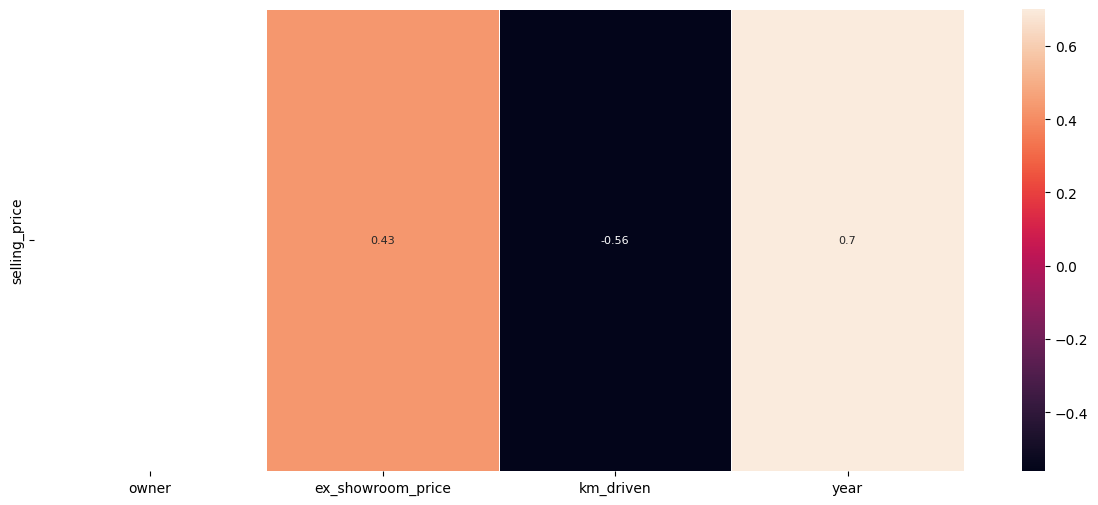

In [8]:
# correlation matrix heatmap
fig, axes = plt.subplots(figsize=(15,6))
annot_size = 8

# Retain only correlation values above 0.4
mask = np.zeros_like(corr_df_rev, dtype=np.bool_)
mask[corr_df_rev.abs() < 0.4] = True

sns.heatmap(data=corr_df_rev, annot=True, xticklabels=True, yticklabels=True,
            mask=mask, annot_kws={"size": annot_size}, ax=axes,
            linewidth=0.5)